# LEGO Set Analysis

This analysis explores various aspects of LEGO sets, including trends in releases by year, the relationship between price and pieces, popular themes by decade, and a comparison of minifigures in licensed versus non-licensed sets.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join('..', 'utils')))

import data_processing_functions as dpf

In [22]:
lego_df = pd.read_csv('../data/processed/lego_sets_clean.csv')
display(lego_df)

,set_id,set_name,theme_name,subtheme_name,theme_group,set_category,is_licensed,release_year,release_decade,num_pieces,num_minifigs,min_age_recommended,us_retail_price,brickset_url,thumbnail_url,image_url
0,4515-1,straight rails,trains,9v,modern day,normal,False,1991,1990,8,0,0,12.99,https://brickset.com/sets/4515-1,https://images.brickset.com/sets/small/4515-1.jpg,https://images.brickset.com/sets/images/4515-1...
1,4520-1,curved rails,trains,9v,modern day,normal,False,1991,1990,8,0,0,12.99,https://brickset.com/sets/4520-1,https://images.brickset.com/sets/small/4520-1.jpg,https://images.brickset.com/sets/images/4520-1...
2,4531-1,manual points with track,trains,9v,modern day,normal,False,1991,1990,6,0,0,27.99,https://brickset.com/sets/4531-1,https://images.brickset.com/sets/small/4531-1.jpg,https://images.brickset.com/sets/images/4531-1...
3,4548-1,transformer and speed regulator,trains,9v,modern day,normal,False,1991,1990,3,0,0,41.99,https://brickset.com/sets/4548-1,https://images.brickset.com/sets/small/4548-1.jpg,https://images.brickset.com/sets/images/4548-1...
4,2304-1,large building plate,duplo,unknown,pre-school,normal,False,1992,1990,1,0,1,14.99,https://brickset.com/sets/2304-1,https://images.brickset.com/sets/small/2304-1.jpg,https://images.brickset.com/sets/images/2304-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5316,80037-1,dragon of the east,monkie kid,season 3,action/adventure,normal,False,2022,2020,880,4,8,79.99,https://brickset.com/sets/80037-1,https://images.brickset.com/sets/small/80037-1...,https://images.brickset.com/sets/images/80037-...
5317,80038-1,monkie kid's team van,monkie kid,season 3,action/adventure,normal,False,2022,2020,1406,6,9,129.99,https://brickset.com/sets/80038-1,https://images.brickset.com/sets/small/80038-1...,https://images.brickset.com/sets/images/80038-...
5318,80039-1,the heavenly realms,monkie kid,season 3,action/adventure,normal,False,2022,2020,2433,8,10,189.99,https://brickset.com/sets/80039-1,https://images.brickset.com/sets/small/80039-1...,https://images.brickset.com/sets/images/80039-...
5319,80108-1,lunar new year traditions,seasonal,chinese traditional festivals,miscellaneous,normal,False,2022,2020,1066,12,8,79.99,https://brickset.com/sets/80108-1,https://images.brickset.com/sets/small/80108-1...,https://images.brickset.com/sets/images/80108-...


### 1. Analyze the Number of LEGO Sets Released by Year
- Group the data by Year Released and calculate the count of sets for each year.
- Identify trends:
  - Examine if there are periods of steady increases, peaks, or declines in releases.
  - Create a line chart to visualize the number of sets released by year and identify the trends.

Group sets by year

In [23]:
sets_by_year = lego_df.groupby('release_year').size().reset_index(name='set_count')
sets_by_year = sets_by_year.sort_values(by='release_year') # sort by year

display(sets_by_year)

,release_year,set_count
0,1991,4
1,1992,1
2,1993,2
3,1996,4
4,1997,1
5,1998,2
6,1999,1
7,2000,11
8,2001,6
9,2002,9


#### **Release trends over time**

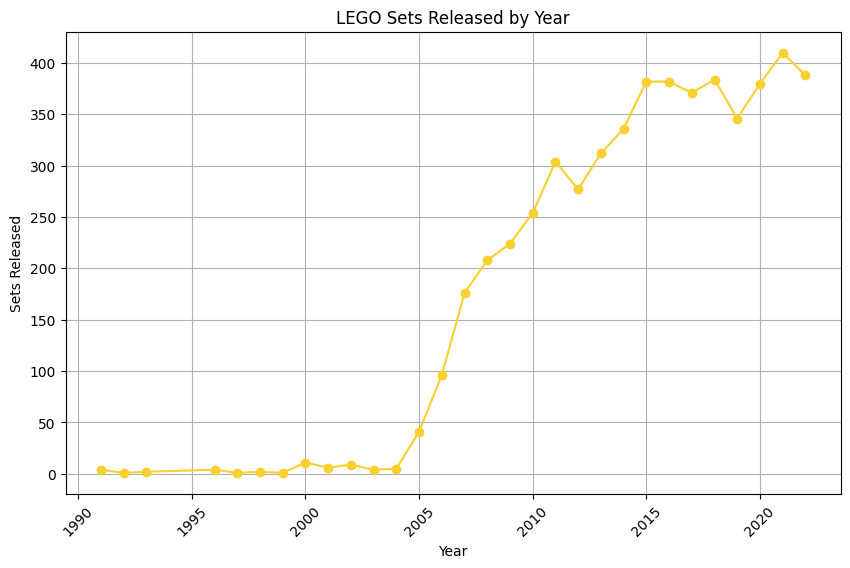

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(sets_by_year['release_year'], sets_by_year['set_count'], marker='o', color='#F8D02F')
plt.title('LEGO Sets Released by Year')
plt.xlabel('Year')
plt.ylabel('Sets Released')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

#### **Long-Term Trends in LEGO Set Releases Using a 5-Year Moving Average**

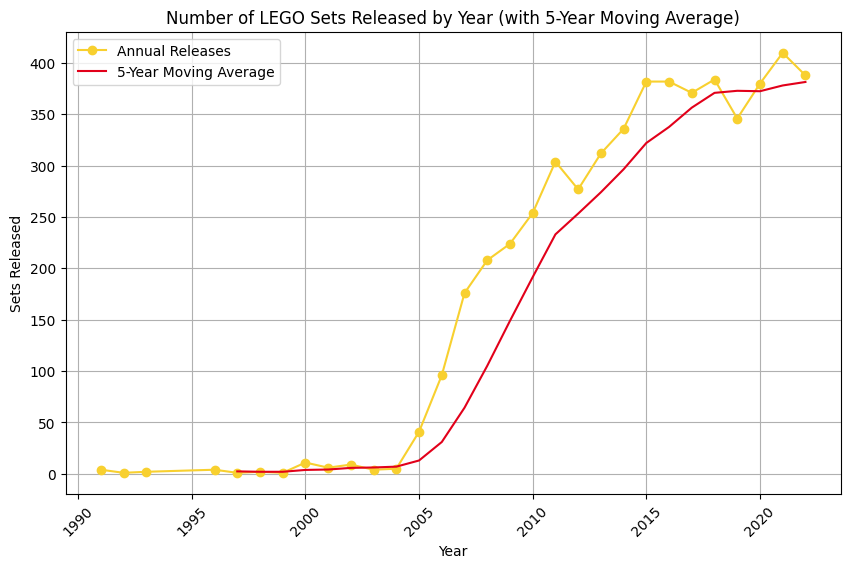

In [25]:
sets_by_year['moving_average'] = sets_by_year['set_count'].rolling(window=5).mean()

plt.figure(figsize=(10, 6))
plt.plot(sets_by_year['release_year'], sets_by_year['set_count'], label='Annual Releases', marker='o', color='#F8D02F')
plt.plot(sets_by_year['release_year'], sets_by_year['moving_average'], label='5-Year Moving Average', color='#E2001A')
plt.title('Number of LEGO Sets Released by Year (with 5-Year Moving Average)')
plt.xlabel('Year')
plt.ylabel('Sets Released')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

### 2. Explore the Relationship Between Price and Pieces
- Calculate the correlation between the Price and Pieces columns to measure the relationship between these variables.
- Create a scatterplot to visually inspect how price scales with the number of pieces.
- Analyze the scatterplot:
  - Assess if the relationship appears linear.
  - Identify any outliers or patterns.

Correlation coefficient between price and pieces

In [35]:
correlation = lego_df[['us_retail_price', 'num_pieces']].corr()
print("Correlation coefficient between price and pieces:\n")
display(correlation)

Correlation coefficient between price and pieces:



,us_retail_price,num_pieces
us_retail_price,1.000000,0.867441
num_pieces,0.867441,1.000000


#### **Interpretation of the Correlation Coefficient**

The correlation coefficient ranges from -1 to 1:
- **1** indicates a perfect positive linear relationship (as one variable increases, the other increases in a perfectly consistent manner).
- **-1** indicates a perfect negative linear relationship (as one variable increases, the other decreases in a perfectly consistent manner).
- **0** indicates no linear relationship between the variables.

In your case, the correlation is **0.867441**, which is **strongly positive**. This means that there is a **strong positive relationship** between the number of pieces (`num_pieces`) and the price (`us_retail_price`). As the number of pieces in a LEGO set increases, the price of the set tends to increase as well.

### What Does This Mean in Practical Terms?

- **Larger sets tend to be more expensive**: The high correlation value indicates that, generally, sets with more pieces are priced higher. This is consistent with expectations since more pieces typically require more materials, manufacturing costs, and packaging.
  
- **Strength of the relationship**: A correlation of **0.867441** suggests that while the number of pieces is a strong predictor of price, it's not perfect. There may be other factors influencing the price, such as the type of pieces (e.g., special bricks, licensed characters, or rare elements), licensing deals (e.g., Star Wars or Marvel sets), or market conditions.

### Important Note:
A strong positive correlation does not imply **causation**. It simply indicates that the two variables (price and pieces) tend to vary in a similar direction. The actual price of a LEGO set can be influenced by several factors beyond just the number of pieces.

### Conclusion:
The strong positive correlation (**0.867**) suggests that as the number of pieces in a LEGO set increases, the price tends to increase as well, though there may be other factors contributing to the pricing of certain sets.


### 3. Identify the Most Popular Theme by Decade
- Add a new column to categorize each set into a decade based on its Year Released (e.g., 1980s, 1990s, etc.).
- Group the data by Decade and Theme, and count the number of sets for each theme in each decade.
- Identify the theme with the highest number of sets for each decade.
- Visualize the most popular theme for each decade using a bar chart or other suitable plot.

In [27]:
# your code

### 4. Evaluate Minifigures and Licensed Sets
- Group the data into licensed and non-licensed sets based on the Is Licensed column.
- Calculate the average and median number of minifigures in both licensed and non-licensed sets.
- Create a bar chart or boxplot to visually compare the number of minifigures in licensed vs. non-licensed sets.

In [28]:
# your code

### 5. Conclusions and Insights
- Summarize the key insights and trends observed from the analyses:
    - Key takeaways from the number of sets released by year.
    - The relationship between price and pieces.
    - Most popular themes by decade.
    - Comparison of minifigures in licensed vs. non-licensed sets.

- Offer potential business or design recommendations based on the findings.